In [1]:
import random
#from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
#from google.colab import files
random.seed(8281)

### Preprocessing

In [2]:
heart_group2 = pd.read_csv('heart_failure_clinical_records_dataset.csv', header = 0)

In [3]:
heart_group2.head(6)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1


In [4]:
heart_group2.anaemia = heart_group2.anaemia.astype('category')
heart_group2.diabetes = heart_group2.diabetes.astype('category')
heart_group2.high_blood_pressure = heart_group2.high_blood_pressure.astype('category')
heart_group2.sex = heart_group2.sex.astype('category')
heart_group2.smoking = heart_group2.smoking.astype('category')
heart_group2.DEATH_EVENT = heart_group2.DEATH_EVENT.astype('category')

heart_group2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    float64 
 1   anaemia                   299 non-null    category
 2   creatinine_phosphokinase  299 non-null    int64   
 3   diabetes                  299 non-null    category
 4   ejection_fraction         299 non-null    int64   
 5   high_blood_pressure       299 non-null    category
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    int64   
 9   sex                       299 non-null    category
 10  smoking                   299 non-null    category
 11  time                      299 non-null    int64   
 12  DEATH_EVENT               299 non-null    category
dtypes: category(6), float64(3), int64(4)
memory usage:

### Describe the Datatset - Heart Failure

In [5]:
heart_group2.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


### Correlation Plot with numerical variables

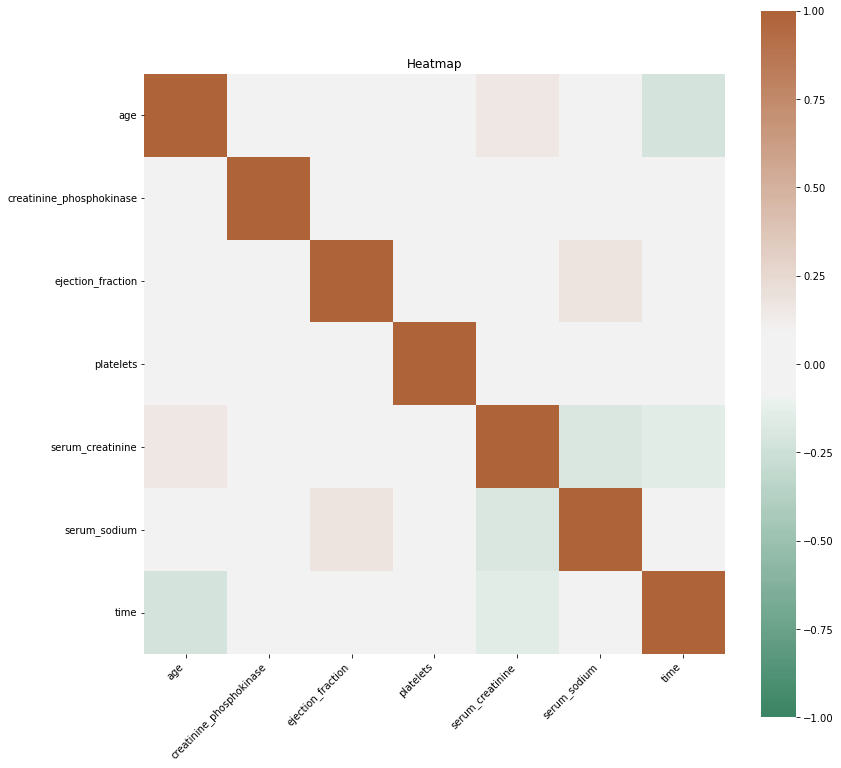

In [6]:
from matplotlib import rcParams

## Exclude the categorical variables:
categorical = ['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']
numerical = [item for item in list(heart_group2.columns) if item not in categorical]

rcParams['figure.figsize'] = 13,13
correlation_plot_group2 = heart_group2.loc[:,numerical].corr()
ax = sns.heatmap(
    correlation_plot_group2, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(870, 30, sep=25, n=220),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


plt.title('Heatmap')
plt.savefig("app\static\heatmap.svg")

There is no heavily correlated variables according to the plot. Thus, it is not necessary to delete any variable for further analysis. 

### EDA correlationplot with categorical variables

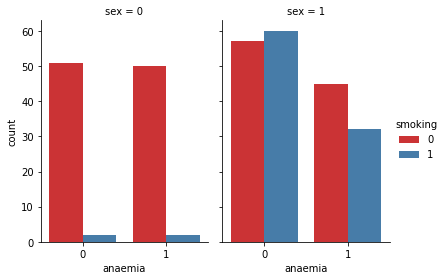

In [9]:
sns.catplot(x="anaemia", hue="smoking", col="sex",
                data=heart_group2, kind="count",palette="Set1",
                height=4, aspect=.7);


#plt.title('Barplot by Sex and Anaemia')
plt.savefig("app\static\barplot1.svg")

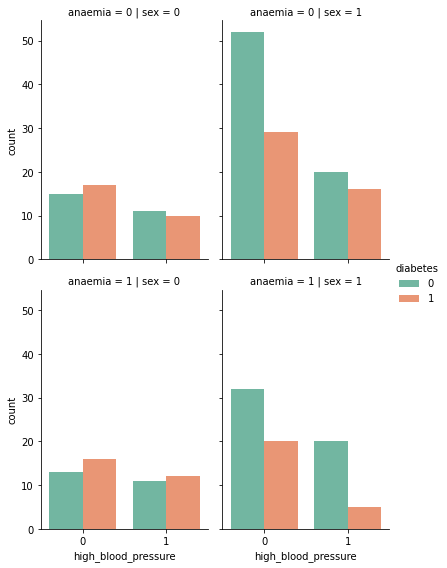

In [10]:
sns.catplot(x="high_blood_pressure", hue="diabetes", col="sex", row="anaemia",
                data=heart_group2, kind="count",palette="Set2",
                height=4, aspect=.7);

#plt.title('Barplot by Sex and Anaemia')
plt.savefig("app\static\barplot2.svg")

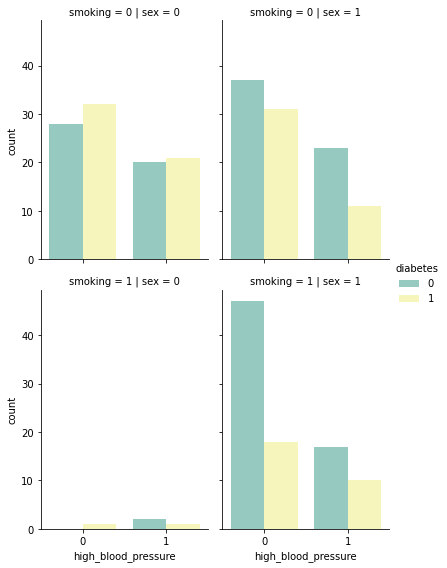

In [11]:
sns.catplot(x="high_blood_pressure", hue="diabetes", col="sex", row="smoking",
                data=heart_group2, kind="count",palette="Set3",
                height=4, aspect=.7);

plt.savefig("app\static\barplot3.svg")

### Scatter Plot 

In [13]:
import plotly.express as px
import plotly
df_8281 = heart_group2.loc[:,numerical]
df_8281.loc[:,'DEATH_EVENT'] = heart_group2.loc[:,'DEATH_EVENT']
df_8281.DEATH_EVENT = df_8281.DEATH_EVENT.astype('category')

fig = px.scatter_matrix(df_8281,
                        symbol="DEATH_EVENT", 
                        color = 'DEATH_EVENT',
                        title="Scatter matrix of Heart Failure Data", 
                        labels={col:col.replace('_', ' ') for col in df_8281.columns},
                        ) 
fig.update_traces(diagonal_visible=False)
fig.show()

plotly.offline.plot(fig, image_filename='scatterplot', image='svg')

### Split to Training and Testing

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
#from xgboost import XGBClassifier

In [15]:
x = heart_group2.iloc[:,:12]
y = heart_group2.iloc[:,12]

We use split size = 0.1 because it is a relatively small dataset, so we need more training points. 

In [16]:
X_train_group2, X_test_group2, y_train_group2, y_test_group2 = train_test_split(x, y, test_size=0.1, random_state=8281)

## Classification and Refression




In [17]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBRegressor
#from xgboost import XGBClassifier as XGB
from sklearn.ensemble import StackingClassifier
#from lightgbm import LGBMRegressor
from sklearn.ensemble import BaggingClassifier

### List of Base Models

We will be building a base model where all the regression and classification models will be stored in it. They will be used to train models and plot accuracy plot. 

In [18]:
def base_models():
    models = dict()
    models['lg'] = LogisticRegression()
    models["KNN"] = KNeighborsClassifier()
    models["SVC"] = SVC()
    models["Tree"] = DecisionTreeClassifier()
    models["Random Forest"] = RandomForestClassifier()
    models["GBM"] = GradientBoostingClassifier()
    models["GNB"] = GaussianNB()
    models["Bagging"] = BaggingClassifier()
    #models['XGB'] = XGB()
    return models

### Evaluate the list of models

This is the function that will be used to give out accuracy scores on the model.

In [19]:
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot


def eval_models(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, x, y,scoring='accuracy', cv=cv)
    return scores

### Test the base Models

This is to find the accuracy for each model in the base model so we know which one is the most accurate. 

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
models = base_models()
# evaluate the models and store results
results, names = list(), list() 

for name, model in models.items():
    scores = eval_models(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

>lg 0.825 (0.076)
>KNN 0.624 (0.071)
>SVC 0.679 (0.085)
>Tree 0.775 (0.069)
>Random Forest 0.855 (0.083)
>GBM 0.843 (0.074)
>GNB 0.794 (0.087)
>Bagging 0.809 (0.080)


### Change regressmod df to classmo


In [22]:
classmod = pd.DataFrame(np.transpose(results), columns = ["lg","KNN","SVC","Tree","Random Forest","GBM","GNB","Bagging"])
classmod = pd.melt(classmod.reset_index(), id_vars='index',value_vars=["lg","KNN","SVC","Tree","Random Forest","GBM","GNB","Bagging"])
classmod = classmod.dropna()
classmod

,index,variable,value
0,0,lg,0.866667
1,1,lg,0.866667
2,2,lg,0.666667
3,3,lg,0.800000
4,4,lg,0.700000
...,...,...,...
235,25,Bagging,0.800000
236,26,Bagging,0.866667
237,27,Bagging,0.800000
238,28,Bagging,0.733333


### Accuracy Box Plot

In [24]:
import plotly.express as px
import plotly
fig = px.box(classmod, x="variable", y="value",color="variable",points='all')
fig.show()

plotly.offline.plot(fig, image_filename='Boxplot_classmod1', image='svg')

GBM gives the best accuracy value in classification analysis with the average accuracy 0.84. And bagging gives the second best value. So we can try to stack them together to get a stacked model.

In [25]:
def get_stacking():
    level0 = list()
    level0.append(('GBM', GradientBoostingClassifier()))  
    level0.append(('Bagging', BaggingClassifier()))
    level1 = LogisticRegression()
# define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [26]:
def multiple_models():
    models = dict()
    models["GBM"] = GradientBoostingClassifier()
    models["lg"] = LogisticRegression()
    models["Stacked Model"] = get_stacking()
    return models

In [27]:
models = multiple_models()

results, names = list(), list() 
for name, model in models.items():
    scores = eval_models(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

classmod2 = pd.DataFrame(np.transpose(results), 
                         columns = ["GBM","lg","Stacked Model"])
classmod2 = pd.melt(classmod2.reset_index(), 
                    id_vars='index',
                    value_vars=["GBM","lg","Stacked Model"])

>GBM 0.843 (0.073)
>lg 0.825 (0.076)
>Stacked Model 0.685 (0.091)


In [28]:
classmod2 = classmod2.dropna()
fig = px.box(classmod2, x="variable", y="value",color="variable",points='all')
fig.show()

plotly.offline.plot(fig, image_filename='Boxplot_classmod2', image='svg')

### Export to pickle

In [29]:
import pickle

# export the model in a pickle file
pkl_filename = "pickle.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(models, file)

In [30]:
# load the model
with open(pkl_filename, 'rb') as file:
    pickle_models = pickle.load(file)

GBM Test score: 90.00%
lg Test score: 73.33%
Stacked Model Test score: 86.67%


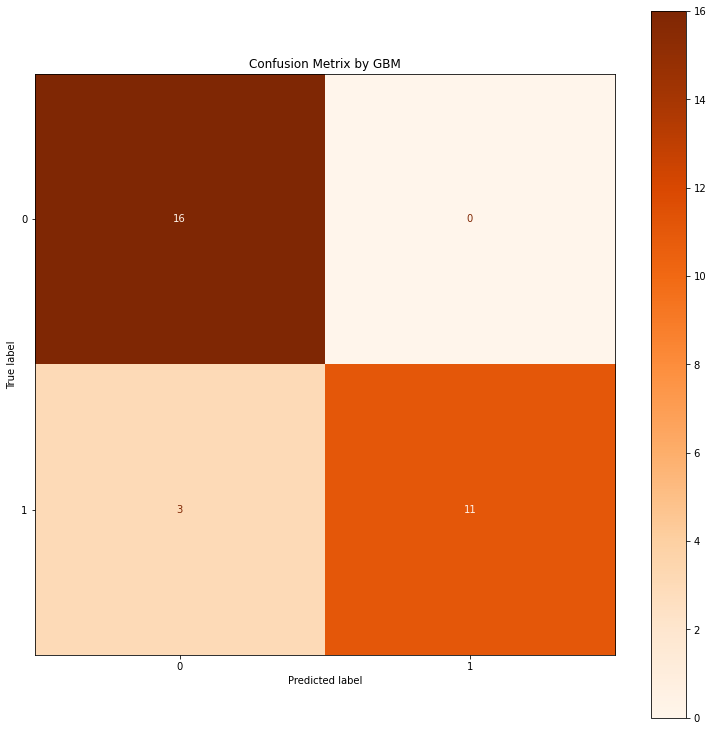

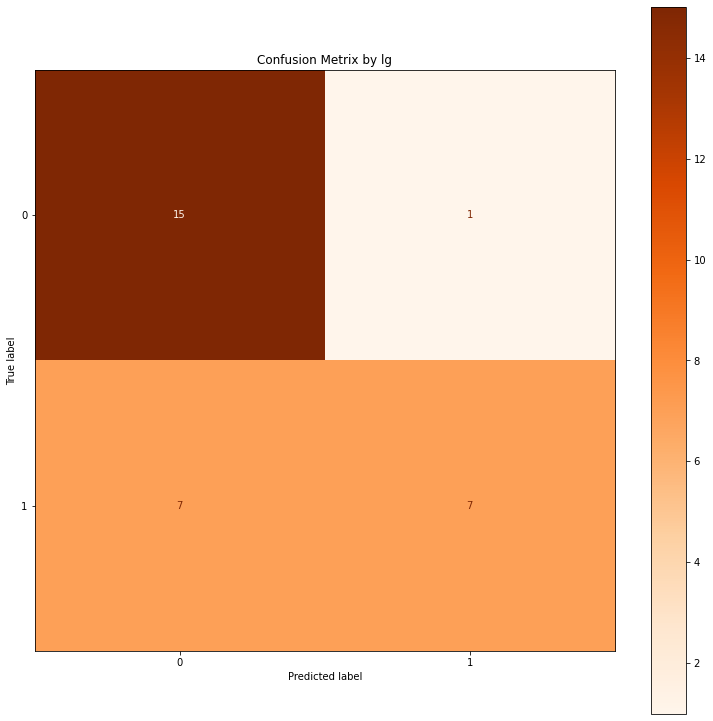

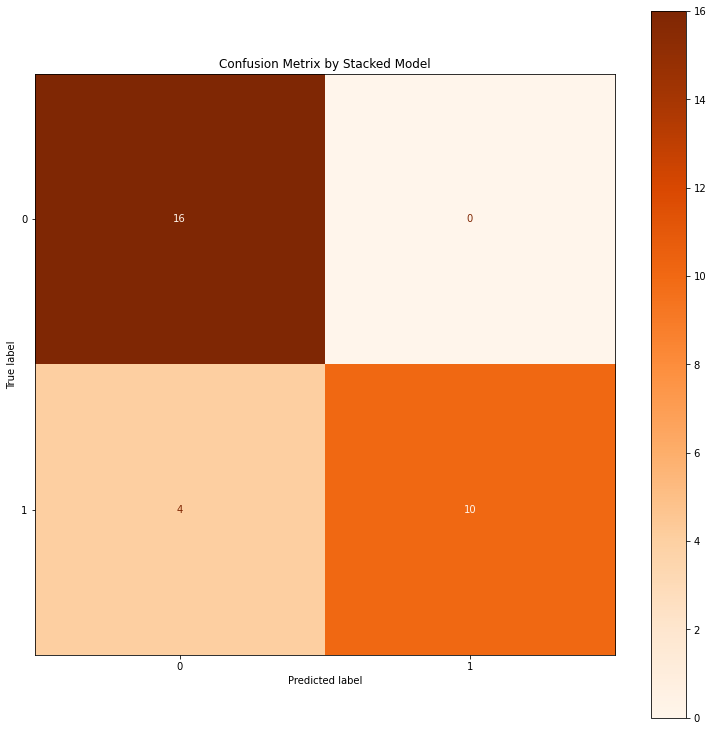

In [31]:
from sklearn import metrics
def hello_world():
    pkl_filename = "app/TrainedModel/pickle.pkl"
    for i in pickle_models:
        model = pickle_models.get(i)
        mod = model.fit(X_train_group2, y_train_group2)

        y_predict = mod.predict(X_test_group2)

      # plot confusion matrix
        title = "Confusion Metrix by " + i
        cnf_matrix = metrics.confusion_matrix(y_test_group2, y_predict)
        cm_group2 = metrics.plot_confusion_matrix(mod, X_test_group2, y_test_group2,
                            cmap=plt.cm.Oranges)
        cm_group2.ax_.set_title(title)
        fig = cm_group2.confusion_matrix

      #print(y_predict)
        score = mod.score(X_test_group2, y_test_group2)
        print(i, "Test score: {0:.2f}%".format(100 * score))
        name = 'app/static/'+title+'.svg'
        plt.savefig(name, format="svg")


hello_world()


In [32]:
model = list(pickle_models.values())[0]
model.fit(X_train_group2,y_train_group2)

GradientBoostingClassifier()

In [51]:
import plotly.graph_objects as go
fig = plotly.subplots.make_subplots(
rows=1, cols=2
)

fig.add_trace(
    go.Scatter(x=heart_group2["age"],y=heart_group2['time'],mode='markers',
    marker=dict(
            color=heart_group2['DEATH_EVENT']),
        line=dict(color="#003366",width=1),showlegend=False),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=heart_group2['ejection_fraction'],y=heart_group2['serum_sodium'],mode='markers',
    marker=dict(
            color=heart_group2['DEATH_EVENT']),
        line=dict(color="#FF6600",width=1),showlegend=False),
    row=1, col=2
)

fig.add_trace(go.Scatter(y=[None], mode='markers',
                         marker=dict(color='yellow'),
                         name='1 (death)',
                         ))

fig.add_trace(go.Scatter(y=[None], mode='markers',
                         marker=dict(color='blue'),
                         name='0 (no death)',
                         ))

# Update xaxis properties
fig.update_xaxes(title_text="Age", range=[36, 99], row=1, col=1)
fig.update_xaxes(title_text="Time", row=1, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Ejection Fraction", row=1, col=1)
fig.update_yaxes(title_text="Serum Sodium", row=1, col=2)
# fig.update_yaxes(title_text="yaxis 2 title", range=[40, 80], row=1, col=2)
# Update title and height
fig.update_layout(height=400, width=800, title_text="Variation in Heart Disease Death Rate")
output_file="app/static/baseimage.svg"
fig.write_image(output_file,width=1200,engine="kaleido")
fig.show()

In [33]:
import plotly.graph_objects as go
def plot_graphs(model,new_input_arr):
    fig = plotly.subplots.make_subplots(
    rows=1, cols=2
    )

    fig.add_trace(
        go.Scatter(x=heart_group2["age"],y=heart_group2['time'],mode='markers',
        marker=dict(
                color=heart_group2['DEATH_EVENT']),
            line=dict(color="#003366",width=1)),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x=heart_group2['ejection_fraction'],y=heart_group2['serum_sodium'],mode='markers',
        marker=dict(
                color=heart_group2['DEATH_EVENT']),
            line=dict(color="#FF6600",width=1)),
        row=1, col=2
    )

    new_preds = model.predict(new_input_arr)
    Age_input = np.array(new_input_arr[0][0])
    Ejection_input =np.array(new_input_arr[0][4])
    Time_input = np.array(new_input_arr[0][11])
    Serum_input =np.array(new_input_arr[0][8])

    fig.add_trace(
    go.Scatter(
        x=Age_input,
        y=Ejection_input,
        mode='markers', name="Scatter Plot1",
        marker=dict(
            color=heart_group2['DEATH_EVENT'],size=15),
        line=dict(color="#FFCC00",width=1)),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(
            x=Time_input,
            y=Serum_input,
            mode='markers', name="Scatter Plot2",
            marker=dict(
                color=heart_group2['DEATH_EVENT'],size=15),
            line=dict(color="red",width=1)),
            row=1, col=2
    )

    # Update xaxis properties
    fig.update_xaxes(title_text="Age", row=1, col=1)
    fig.update_xaxes(title_text="Time", row=1, col=2)

    # Update yaxis properties
    fig.update_yaxes(title_text="Ejection Fraction", row=1, col=1)
    fig.update_yaxes(title_text="Serum Sodium", row=1, col=2)
    # fig.update_yaxes(title_text="yaxis 2 title", range=[40, 80], row=1, col=2)
    # Update title and height
    fig.update_layout(height=400, width=800, title_text="Variation in Heart Disease Death Rate")
    output_file="app/static/attempt.svg"
    fig.write_image(output_file,width=1200,engine="kaleido")
    fig.show()

In [34]:
def floatsome_to_np_array(floats_str):
    def is_float(s):
        try:
            float(s)
            return True
        except:
            return False
    floats = np.array([float(x) for x in floats_str.split(',') if is_float(x)])
    return floats.reshape(1,len(floats))


arr =floatsome_to_np_array("76,0,582,0,20,1,265000,1.9,130,1,0,4")

In [ ]:
plot_graphs(model,arr)

### Prediction



GBM Test score: 90.00%
lg Test score: 73.33%
Stacked Model Test score: 83.33%


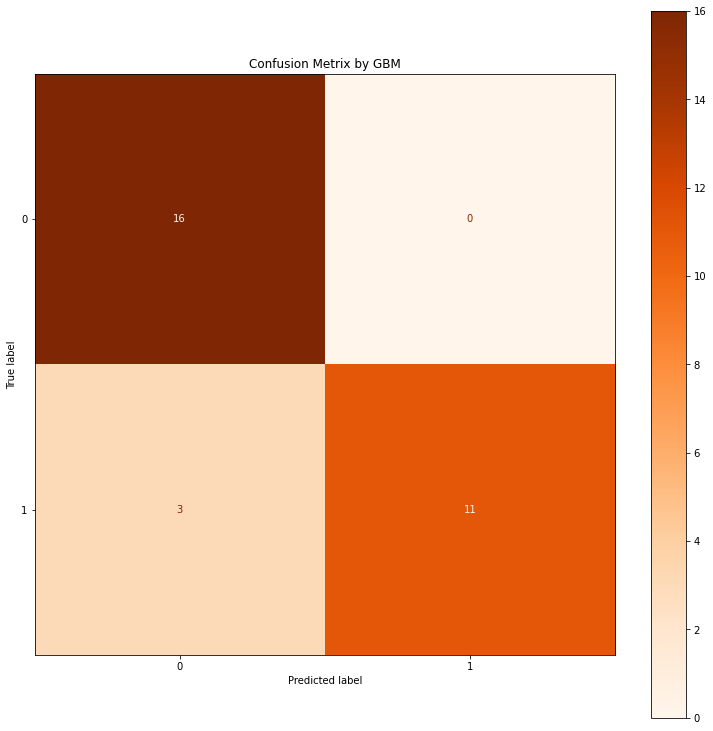

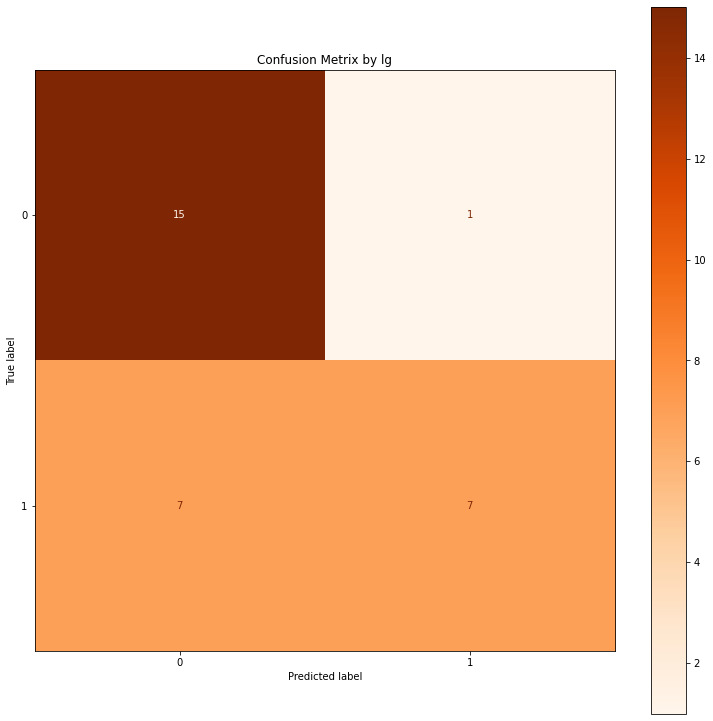

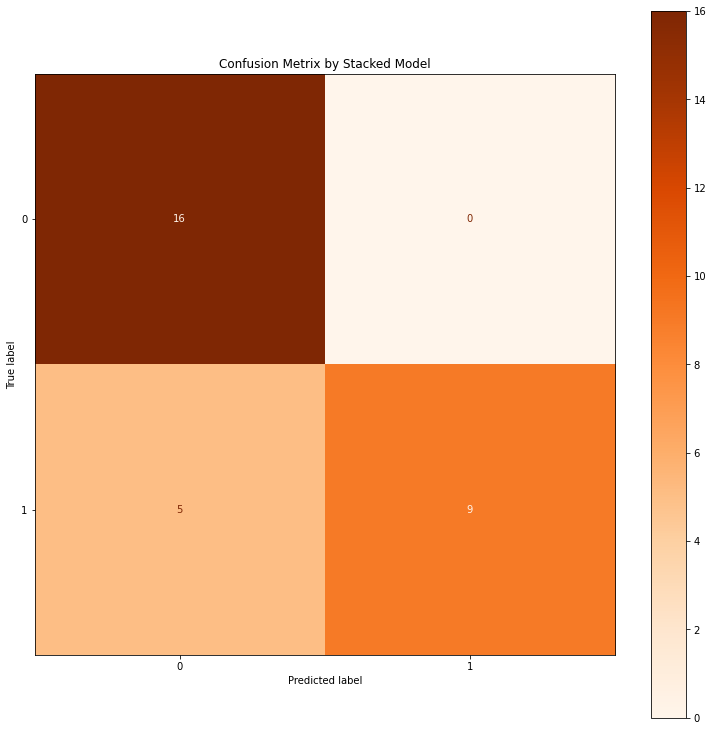

In [45]:
from sklearn import metrics
for i in pickle_models:
    model = pickle_models.get(i)
    mod = model.fit(X_train_group2, y_train_group2)

    y_predict = mod.predict(X_test_group2)
  
  # plot confusion matrix
    title = "Confusion Metrix by " + i
    cnf_matrix = metrics.confusion_matrix(y_test_group2, y_predict)
    cm_group2 = metrics.plot_confusion_matrix(mod, X_test_group2, y_test_group2,
                        cmap=plt.cm.Oranges)
    cm_group2.ax_.set_title(title)
    fig = cm_group2.confusion_matrix

    print(y_predict)
    score = mod.score(X_test_group2, y_test_group2)
    print(i, "Test score: {0:.2f}%".format(100 * score))
    name = title+'.svg'
    plt.savefig(name, format="svg")



The stacked model gives a better prediction than the logistic regression model but worse than the GBM model.

### Feature Importance

#### Use Random Forest

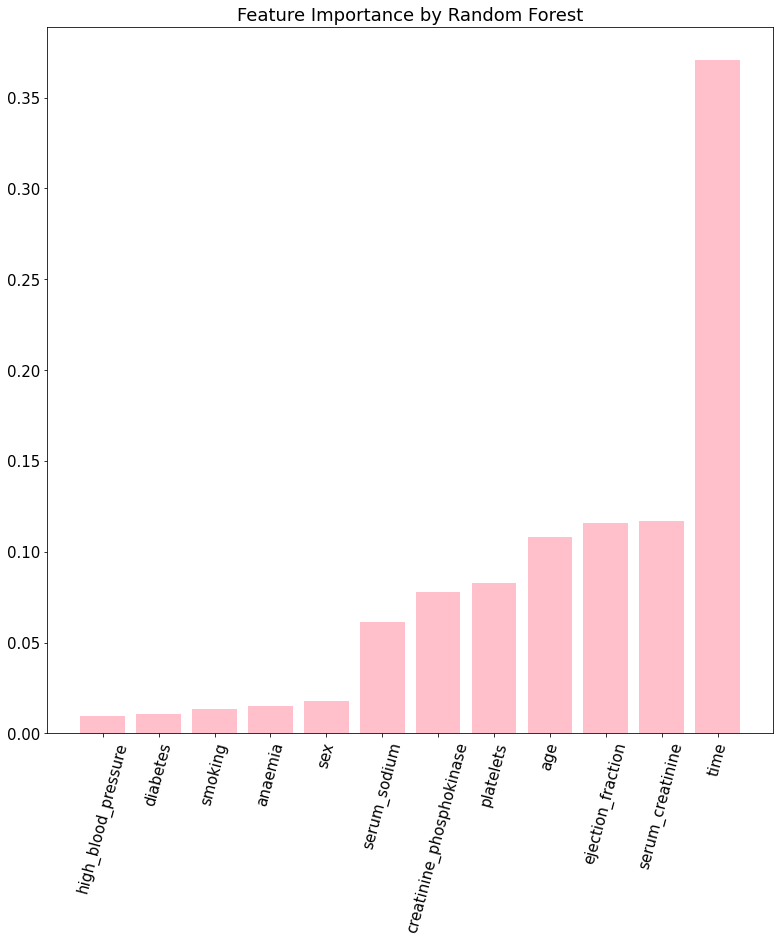

<Figure size 936x936 with 0 Axes>

In [73]:
model = RandomForestClassifier()
# fit the model
model.fit(X_train_group2,y_train_group2)
# get importance
importance = model.feature_importances_
# summarize feature importance

model = LogisticRegression()
# fit the model
model.fit(X_train_group2,y_train_group2)
# get importance
importance2 = model.coef_[0]

df = pd.DataFrame()
for i,v in enumerate(importance):
    j = list(X_train_group2.columns)[i]
    df.loc[i,'feature'] = j
    df.loc[i,'score'] = v

df = df.sort_values('score')

# plot feature importance
plt.rc('font', size=15) 
plt.bar(df['feature'],df['score'], color = 'pink')
plt.xticks(rotation = 75)
plt.title('Feature Importance by Random Forest')
plt.show()
plt.savefig('RF_feature_importance.svg')

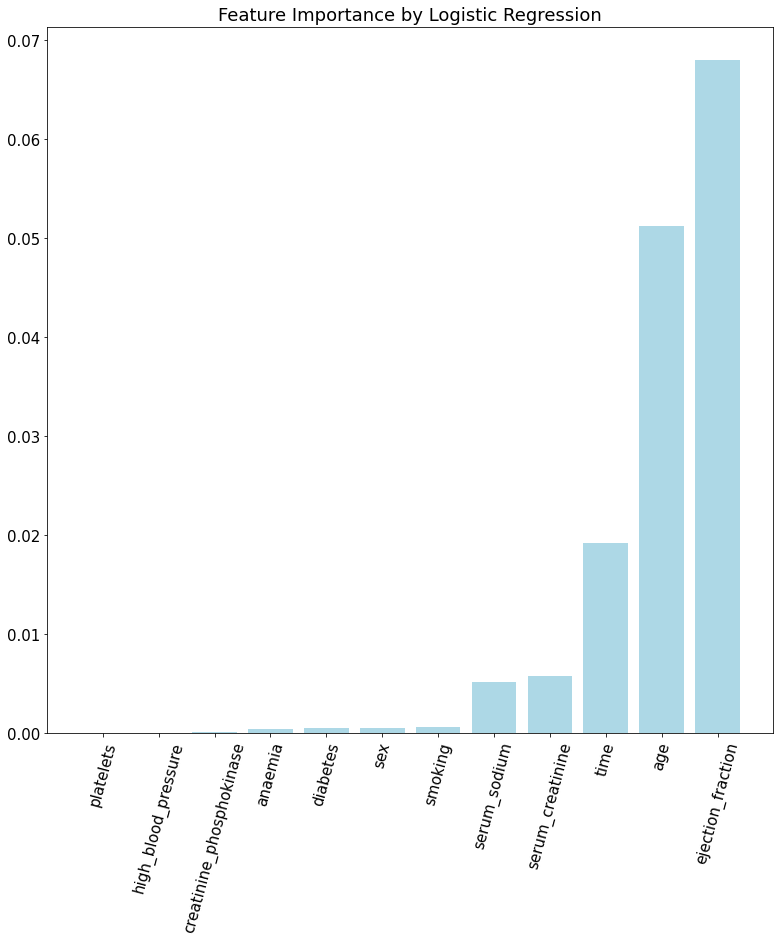

<Figure size 936x936 with 0 Axes>

In [74]:
# logistic regression for feature importance
model = LogisticRegression()
# fit the model
model.fit(X_train_group2,y_train_group2)
# get importance
importance2 = model.coef_[0]

df = pd.DataFrame()
for i,v in enumerate(importance2):
    j = list(X_train_group2.columns)[i]
    df.loc[i,'feature'] = j
    df.loc[i,'score'] = np.abs(v)

df = df.sort_values('score')
plt.bar(df['feature'],df['score'], color = 'lightblue')
plt.xticks(rotation = 75)
plt.title('Feature Importance by Logistic Regression')
plt.show()
plt.savefig('LG_feature_importance.svg')